In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Show plots in notebook
%matplotlib inline


In [2]:
# Dataset path
img_dir = r"C:\Users\SIL-Laptop\Desktop\Final IAI Gustavo\steganography\FDIA 1\RF\Images"  # Folder structure: MMS RF/Images/Attack/, Normal/
img_size = (128, 128)
class_names = ['Attack', 'Normal']


In [3]:
# Load images and labels
print("🔄 Loading and processing images...")
X, y = [], []

for label, class_name in enumerate(class_names):
    class_folder = os.path.join(img_dir, class_name)
    image_files = [f for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for img_file in image_files:
        img_path = os.path.join(class_folder, img_file)
        img = Image.open(img_path).resize(img_size)
        img_array = np.array(img).flatten() / 255.0  # Normalize pixel values
        X.append(img_array)
        y.append(label)

X = np.array(X)
y = np.array(y)

print(f"✅ Loaded {len(X)} images with {X.shape[1]} features each.")


🔄 Loading and processing images...
✅ Loaded 4390 images with 16384 features each.


In [4]:
# Split data
print("🔀 Splitting data into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"✅ Training samples: {len(X_train)}, Test samples: {len(X_test)}")


🔀 Splitting data into train and test sets...
✅ Training samples: 3512, Test samples: 878


In [5]:
# Train Random Forest
print("🌲 Training Random Forest model...")
rf = RandomForestClassifier(n_estimators=200, random_state=6553)
rf.fit(X_train, y_train)
print("✅ Model training complete.")


🌲 Training Random Forest model...
✅ Model training complete.


In [6]:
# Predict
print("🔍 Making predictions on test set...")
y_pred = rf.predict(X_test)


🔍 Making predictions on test set...


In [7]:
# Evaluation
print("\n📊 Evaluation Results:")
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy * 100:.2f}%")

print("🧩 Confusion Matrix (Raw):")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n📝 Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))



📊 Evaluation Results:
✅ Accuracy: 97.38%
🧩 Confusion Matrix (Raw):
[[412  22]
 [  1 443]]

📝 Classification Report:
              precision    recall  f1-score   support

      Attack       1.00      0.95      0.97       434
      Normal       0.95      1.00      0.97       444

    accuracy                           0.97       878
   macro avg       0.98      0.97      0.97       878
weighted avg       0.97      0.97      0.97       878



🖼️ Saving confusion matrix as an image...


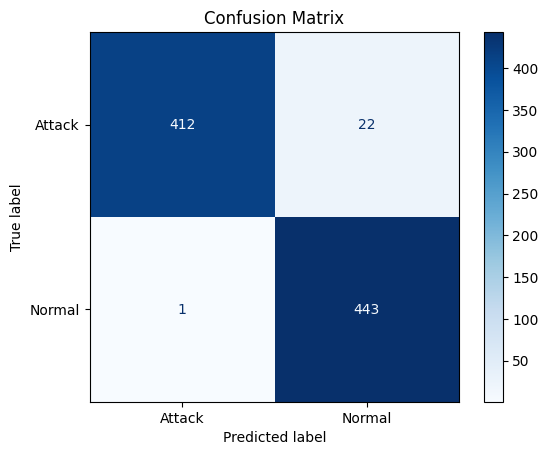

✅ Confusion matrix saved as confusion_matrix.png


<Figure size 640x480 with 0 Axes>

In [8]:
# Confusion matrix visualization
print("🖼️ Saving confusion matrix as an image...")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Save the confusion matrix
plt.savefig("confusion_matrix.png")
print("✅ Confusion matrix saved as confusion_matrix.png")
